# Ezega Data Analysis

Author: [Meheret Samuel](https://github.com/senadev42)

<hr>

### The Pre-amble
A few months ago a friend of mine, [Kidus](https://github.com/kidesleo),  decided to scrape ezega.com, which is a sort of index for bussinesses in ethiopia. The result was a jsonl file with about 8k entries that I've been sitting on with the vague goal of looking into but not finding the time to.

Finally have time now, and while doing data analysis with clean datasets taken off the internet has been fun, it's not time to work with something dirty and real.


## Setting Up

First let's import the libraries we're going to be using.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

#This dataset has long columns
pd.set_option('display.max_colwidth', None)

And then the file itself, setting lines=True to indicate that newlines are being used as a delimiter here because this is jsonl.

In [2]:
df = pd.read_json('ezega_data.jsonl', lines=True)

Now let's take a peek at our data set.

In [3]:
df.head()

,business_title,business_image,business_location,business_url,business_description,business_numbers,ezega_url,category,sub_category
0,Bagel Corner Bakery,https://businessguide.ezega.com/images/noimage.png,Addis Ababa,None,None,"[0116513067, 0911455510, +251116352780, 0115506104, 251116546674, +251111234015, +25111663949496]",https://businessguide.ezega.com/Default.aspx?action=BussinessDetail&pid=765830&bid=732720&cid=788190,Auto,Resources
1,AWASH BAR & RESTURANT,https://businessguide.ezega.com/images/noimage.png,Mekelle,None,None,"[0344402815, 0344418248, 0344415657]",https://businessguide.ezega.com/Default.aspx?action=BussinessDetail&pid=762390&bid=383775&cid=786685,Auto,Resources
2,BITMAS General Trading PLC,https://businessguide.ezega.com/images/noimage.png,"Ras Desta Damtwe St. NTO Building, 3rd floor, No 20 and our shop is located behind Commercial Colleg",None,None,"[+251115501364, +251911516445+2510911133182, +251115549216, +251116674903, +251116691400, 011416878, +25111116022, +919726772088]",https://businessguide.ezega.com/Default.aspx?action=BussinessDetail&pid=763250&bid=967715&cid=782170,Auto,Water Services
3,ROB VIDEO,https://businessguide.ezega.com/images/noimage.png,Mekelle,None,None,[0344400112],https://businessguide.ezega.com/Default.aspx?action=BussinessDetail&pid=765615&bid=438170&cid=789910,Auto,Water Services
4,Tesfa PLWHA Association,https://businessguide.ezega.com/images/noimage.png,Addis Ababa,None,None,"[0467730206, 0116558830, 2511613426, 0115540391, 0116185992, 01115533010116554776]",https://businessguide.ezega.com/Default.aspx?action=BussinessDetail&pid=766260&bid=803455&cid=769270,Auto,Shipping Companies


As expected, it's a bit messy. 

At a glance, 
- `business_url` and `business_description` look like they have a lot of values missing, 
- the bussiness titles are inconsistently capitalized,
- some of the locations are cities while some of them are full addresses
- and the bussiness numbers are arrays that seem to be a mix of the Country Code +251 suffix and the simple, local 0 suffix
- the categories don't seem super relevant to the companies name so I suspect it wasn't registered properly.

And there's probably other stuff that isn't immediately apparent from this quick look through, but let's work on cleaning this up first.

## Clean Up

### 1. Missing Values

> business_url and business_description look like they have a lot of values missing

Let's start up by seeing exactly how much is missing, and if there's any other fields that are missing data as well.

In [4]:
print("Number of columns: ", df.shape[0])

df.isnull().sum()

Number of columns:  8656


business_title             0
business_image             0
business_location          0
business_url            6754
business_description    7358
business_numbers           0
ezega_url                  0
category                   0
sub_category               0
dtype: int64

Okay, that's actually a lot of missing urls and descriptions. Dropping the rows in question isn't an option when they make up over half of our dataset, so we can just replace them with placeholders for now.

In [5]:
df['business_url'] = df['business_url'].fillna('N/A')
df['business_description'] = df['business_description'].fillna('No description available')

Let's check again.

In [6]:
df.isnull().sum()

business_title          0
business_image          0
business_location       0
business_url            0
business_description    0
business_numbers        0
ezega_url               0
category                0
sub_category            0
dtype: int64

In [7]:
df.head()

,business_title,business_image,business_location,business_url,business_description,business_numbers,ezega_url,category,sub_category
0,Bagel Corner Bakery,https://businessguide.ezega.com/images/noimage.png,Addis Ababa,N/A,No description available,"[0116513067, 0911455510, +251116352780, 0115506104, 251116546674, +251111234015, +25111663949496]",https://businessguide.ezega.com/Default.aspx?action=BussinessDetail&pid=765830&bid=732720&cid=788190,Auto,Resources
1,AWASH BAR & RESTURANT,https://businessguide.ezega.com/images/noimage.png,Mekelle,N/A,No description available,"[0344402815, 0344418248, 0344415657]",https://businessguide.ezega.com/Default.aspx?action=BussinessDetail&pid=762390&bid=383775&cid=786685,Auto,Resources
2,BITMAS General Trading PLC,https://businessguide.ezega.com/images/noimage.png,"Ras Desta Damtwe St. NTO Building, 3rd floor, No 20 and our shop is located behind Commercial Colleg",N/A,No description available,"[+251115501364, +251911516445+2510911133182, +251115549216, +251116674903, +251116691400, 011416878, +25111116022, +919726772088]",https://businessguide.ezega.com/Default.aspx?action=BussinessDetail&pid=763250&bid=967715&cid=782170,Auto,Water Services
3,ROB VIDEO,https://businessguide.ezega.com/images/noimage.png,Mekelle,N/A,No description available,[0344400112],https://businessguide.ezega.com/Default.aspx?action=BussinessDetail&pid=765615&bid=438170&cid=789910,Auto,Water Services
4,Tesfa PLWHA Association,https://businessguide.ezega.com/images/noimage.png,Addis Ababa,N/A,No description available,"[0467730206, 0116558830, 2511613426, 0115540391, 0116185992, 01115533010116554776]",https://businessguide.ezega.com/Default.aspx?action=BussinessDetail&pid=766260&bid=803455&cid=769270,Auto,Shipping Companies


Well that fixes that.

### 2. Cleaning the title

> the bussiness titles are inconsistently capitalized,

This would be somewhat of a non-issue if I didn't plan on doing some analysis on the names themselves later. And it frankly feels like a tricky issue to solve. Let's look at the bussiness_title column and see what we're working with first.

In [8]:
def is_fully_capitalized(title):
    '''
    For every bussiness title:
    1. Split it into words using space as a separator
    2. Count the number of words int he title
    3. Check if each word is capital, and count the number of fully capital words
    4. If that is equal to the total amount of words then the title is full capitalized, return true
    '''
    words = title.split()
    total_words = len(words)
    capitalized_words = sum(word.isupper() for word in words)
    return capitalized_words == total_words

fully_capitalized_titles = df[df['business_title'].apply(is_fully_capitalized)]

print("Number of titles where all the words are capitalized")
print(fully_capitalized_titles['business_title'].shape[0])

Number of titles where all the words are capitalized
3948


Okay that's nearly half the titles. Also not very meaningful. 

Putting it in a binary yes-or-now way doesn't seem to be the best way of looking at this so let's look at a distribution instead.


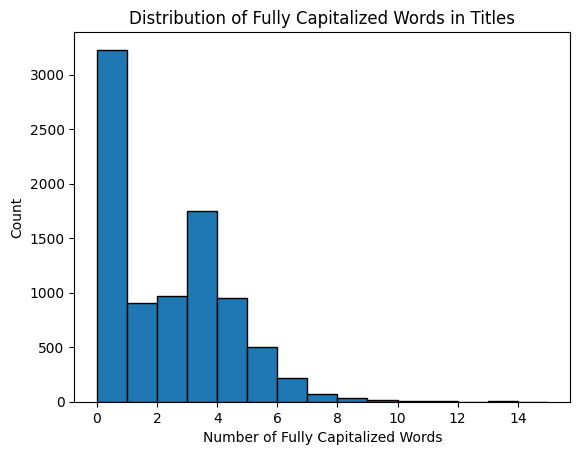

In [9]:
def count_fully_capitalized_words(title):
    words = title.split()
    capitalized_words = sum(word.isupper() for word in words)
    return capitalized_words

df['fully_capitalized_words_count'] = df['business_title'].apply(count_fully_capitalized_words)

plt.hist(df['fully_capitalized_words_count'], bins=range(df['fully_capitalized_words_count'].max() + 2), edgecolor='black')
plt.xlabel('Number of Fully Capitalized Words')
plt.ylabel('Count')
plt.title('Distribution of Fully Capitalized Words in Titles')
plt.show()


So the half the bussiness titles have no full uppercase words, and for the ones that do contain fully capitalized titles the count seems to peak at 3 and can extend as far as ... 14. Actually I want to see the full distribution for the word length now.

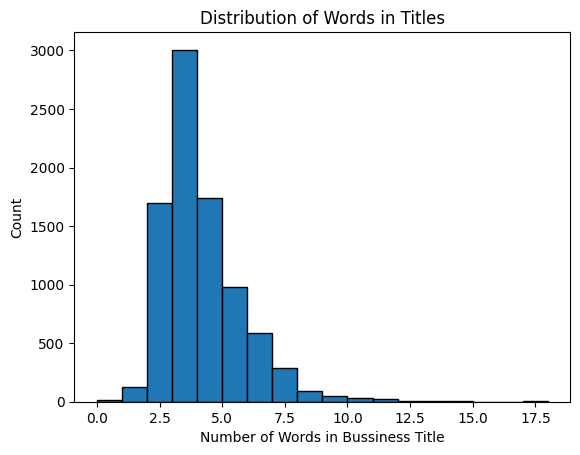

In [10]:
def count_words(title):
    words = title.split()
    return len(words)

df['total_words_count'] = df['business_title'].apply(count_words)

plt.hist(df['total_words_count'], bins=range(df['total_words_count'].max() + 2), edgecolor='black')
plt.xlabel('Number of Words in Bussiness Title')
plt.ylabel('Count')
plt.title('Distribution of Words in Titles')
plt.show()

So we've got titles as short as 0 words and as long as 17.5(?) words. Let's take a look at the first group.



In [11]:
print("Number of titles with 0 words: ", df[df['total_words_count'] == 0].shape[0])

df[df['total_words_count'] == 0].head()

Number of titles with 0 words:  13


,business_title,business_image,business_location,business_url,business_description,business_numbers,ezega_url,category,sub_category,fully_capitalized_words_count,total_words_count
333,,https://businessguide.ezega.com/images/noimage.png,\r\n\t \r\n\t \r\n \r\n\t \r\n\t \r\n\t \r\n \r\n\t,N/A,No description available,"[0251113453, 0251114254, 02511148900251118151, 025111489302511109950251119149, 02511122000251125923]",https://businessguide.ezega.com/Default.aspx?action=BussinessDetail&pid=763250&bid=3289285&cid=781955,Auto,Spare Parts,0,0
3509,,https://businessguide.ezega.com/images/thumb/pict0-13753.jpg?time9/26/2023 9:50:50 AM,\r\n\t \r\n\t \r\n \r\n\t \r\n\t \r\n\t \r\n \r\n\t,N/A,No description available,[],https://businessguide.ezega.com/Default.aspx?action=BussinessDetail&pid=794425&bid=3235535&cid=794855,Auto,Resorts,0,0
3602,,https://businessguide.ezega.com/images/thumb/pict0-13753.jpg?time9/26/2023 9:51:07 AM,\r\n\t \r\n\t \r\n \r\n\t \r\n\t \r\n\t \r\n \r\n\t,N/A,No description available,[],https://businessguide.ezega.com/Default.aspx?action=BussinessDetail&pid=794425&bid=3235535&cid=794855&page=0,Auto,Ethiopian Evangelical,0,0
3655,,https://businessguide.ezega.com/images/noimage.png,\r\n\t \r\n\t \r\n \r\n\t \r\n\t \r\n\t \r\n \r\n\t,N/A,No description available,"[6122268326, 0920607823, 251115516777, 251116292285, 251115512686]",https://businessguide.ezega.com/Default.aspx?action=BussinessDetail&pid=764970&bid=1407605&cid=782385,Auto,Ethiopian Evangelical,0,0
3883,,https://businessguide.ezega.com/images/thumb/pict0-6540.jpg?time9/26/2023 9:51:49 AM,\r\n\t \r\n\t \r\n \r\n\t \r\n\t \r\n\t \r\n \r\n\t,N/A,No description available,"[+251116180578, 0911241526, 0911241526, 0115529150, 0115539135]",https://businessguide.ezega.com/Default.aspx?action=BussinessDetail&pid=763680&bid=1684740&cid=771420,Healthcare,Spa/Massage,0,0


We'll have to drop these I suppose since there's not much we can do with them. The locations are malformed and the urls go nowhere as well.

In [12]:
df = df[df['total_words_count'] != 0]

df[df['total_words_count'] == 0].head()

,business_title,business_image,business_location,business_url,business_description,business_numbers,ezega_url,category,sub_category,fully_capitalized_words_count,total_words_count


Back to the distribution. Let's now look at the second and figure out why we've got such long titles.

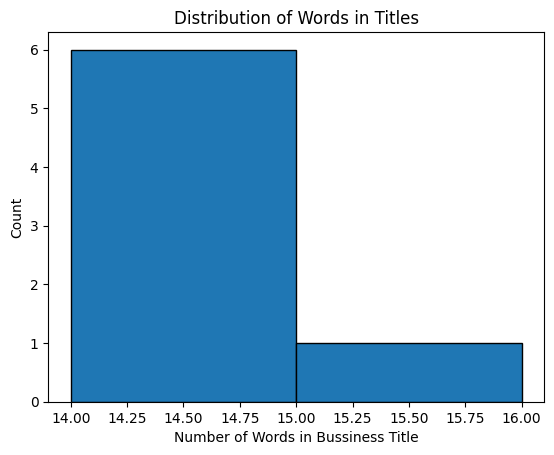

(10, 11)


,business_title,business_image,business_location,business_url,business_description,business_numbers,ezega_url,category,sub_category,fully_capitalized_words_count,total_words_count
1160,"Addis ababa water and sewerage authority invitation to bid is a company located in Addis Ababa, Eth",https://businessguide.ezega.com/images/thumb/pict0-12890.jpg?time9/26/2023 9:44:42 AM,"Addis Ababa,Ethiopia",N/A,No description available,"[251116620010, +251115575566, 25111663059866338156632754, 0115159213, 0114655687, 0116630597]",https://businessguide.ezega.com/Default.aspx?action=BussinessDetail&pid=764540&bid=3049990&cid=784750&page=3,Auto,Spare Parts,0,17
1948,HOLIDAY IN ETHIOPIA | VACATION IN ETHIOPIA | OVERLAND ETHIOPIA TOUR | ETHIOPIA TOUR PACKAGES AND E,https://businessguide.ezega.com/images/thumb/pict0-2738.jpg?time9/26/2023 9:46:44 AM,Ethiopia,http://www.overlandethiopiatours.com,,"[+251911444601, +251913689229+251911678366, +251913689229+251911678366, +251116522507, +25111551349455045535528822, +251118602442]",https://businessguide.ezega.com/Default.aspx?action=BussinessDetail&pid=766045&bid=867310&cid=791200&page=4,Auto,Other Tour/Travel,14,17
5810,"Southern Nations, Nationalities & People’s Regional State - Institute For The Study of Nationalities",https://businessguide.ezega.com/images/thumb/pict0-303.jpg?time9/26/2023 9:56:39 AM,Awassa,http://www.snnprs.gov.et,No description available,"[046220588704622040620462214779046220, 0462210074, 1546, 0462206364, 0462260370, 0462209870, 04622070690462205863, 04622039610462200282]",https://businessguide.ezega.com/Default.aspx?action=BussinessDetail&pid=766690&bid=343785&cid=777870&page=3,Education,Suppliers,0,14
6336,"Addistech security camera/CCTV/, Home Alarm, Time attendance machine & Fire Alarm system provider c",https://businessguide.ezega.com/images/thumb/pict0-5256.jpg?time9/26/2023 9:57:46 AM,"Bole Africa Ave, DH Geda Tower #206",www.addistechsolution.com,No description available,"[0912604414, 0911502614, 18368, +2519132560640911306530, 862150320898, 251111570898, +251115549172, +25111156200715724831572485]",https://businessguide.ezega.com/Default.aspx?action=BussinessDetail&pid=765400&bid=1408680&cid=774000&page=0,Education,Suppliers,0,14
6344,"Addistech security camera/CCTV/, Home Alarm, Time attendance machine & Fire Alarm system provider c",https://businessguide.ezega.com/images/thumb/pict0-5256.jpg?time9/26/2023 9:57:47 AM,"Bole Africa Ave, DH Geda Tower #206",www.addistechsolution.com,No description available,"[0912604414, 0911502614, 18368, +2519132560640911306530, 862150320898, 251111570898, +251115549172, +25111156200715724831572485]",https://businessguide.ezega.com/Default.aspx?action=BussinessDetail&pid=765400&bid=1408680&cid=774000,Education,Suppliers,0,14


In [13]:
upper_bound = 14

plt.hist(df[df['total_words_count'] >= upper_bound]['total_words_count'], bins=range(upper_bound, df[df['total_words_count'] >= upper_bound]['total_words_count'].max() ), edgecolor='black')
plt.xlabel('Number of Words in Bussiness Title')
plt.ylabel('Count')
plt.title('Distribution of Words in Titles')
plt.show()

print(df[df['total_words_count'] >= upper_bound].shape)
df[df['total_words_count'] >= upper_bound].head()

In [14]:
upper_bound = 15

print(df[df['total_words_count'] >= upper_bound].shape)
df[df['total_words_count'] >= upper_bound].head()

(4, 11)


,business_title,business_image,business_location,business_url,business_description,business_numbers,ezega_url,category,sub_category,fully_capitalized_words_count,total_words_count
1160,"Addis ababa water and sewerage authority invitation to bid is a company located in Addis Ababa, Eth",https://businessguide.ezega.com/images/thumb/pict0-12890.jpg?time9/26/2023 9:44:42 AM,"Addis Ababa,Ethiopia",N/A,No description available,"[251116620010, +251115575566, 25111663059866338156632754, 0115159213, 0114655687, 0116630597]",https://businessguide.ezega.com/Default.aspx?action=BussinessDetail&pid=764540&bid=3049990&cid=784750&page=3,Auto,Spare Parts,0,17
1948,HOLIDAY IN ETHIOPIA | VACATION IN ETHIOPIA | OVERLAND ETHIOPIA TOUR | ETHIOPIA TOUR PACKAGES AND E,https://businessguide.ezega.com/images/thumb/pict0-2738.jpg?time9/26/2023 9:46:44 AM,Ethiopia,http://www.overlandethiopiatours.com,,"[+251911444601, +251913689229+251911678366, +251913689229+251911678366, +251116522507, +25111551349455045535528822, +251118602442]",https://businessguide.ezega.com/Default.aspx?action=BussinessDetail&pid=766045&bid=867310&cid=791200&page=4,Auto,Other Tour/Travel,14,17
6750,Caltex lubricants | Dubai | UAE | Saudi Arabia | Saudi | Bahrain | Kuwait /Oman Egypt,https://businessguide.ezega.com/images/noimage.png,"National Oil Ethiopia, PLC Bole Sub-City, on Cape Verde street Addis Ababa Ethiopia",https://me.caltexlubricants.com/,No description available,"[043373220, 0904647909, +251911515139, +251116620911, +25111646088586, +25111552845255110973]",https://businessguide.ezega.com/Default.aspx?action=BussinessDetail&pid=767765&bid=3260045&cid=777655&page=5,Education,Suppliers,1,17
7189,Gethan Trading and Technology PLC - Food Stuffs Local Distributer and Agent Eden Spring Water,https://businessguide.ezega.com/images/thumb/pict0-13495.jpg?time9/26/2023 10:00:00 AM,"Bole Sub city, around Jakros, EBM building Office No. 2AF2018",N/A,No description available,"[+251911642409+251930797079, +251921146614, +251118613504, +251115512186, +251911423244, +251221120373, +2511166245326188000]",https://businessguide.ezega.com/Default.aspx?action=BussinessDetail&pid=764325&bid=3180065&cid=778300,Education,International Organizations,1,15


In [15]:
upper_bound = 16

print(df[df['total_words_count'] >= upper_bound].shape)
df[df['total_words_count'] >= upper_bound].head()

(3, 11)


,business_title,business_image,business_location,business_url,business_description,business_numbers,ezega_url,category,sub_category,fully_capitalized_words_count,total_words_count
1160,"Addis ababa water and sewerage authority invitation to bid is a company located in Addis Ababa, Eth",https://businessguide.ezega.com/images/thumb/pict0-12890.jpg?time9/26/2023 9:44:42 AM,"Addis Ababa,Ethiopia",N/A,No description available,"[251116620010, +251115575566, 25111663059866338156632754, 0115159213, 0114655687, 0116630597]",https://businessguide.ezega.com/Default.aspx?action=BussinessDetail&pid=764540&bid=3049990&cid=784750&page=3,Auto,Spare Parts,0,17
1948,HOLIDAY IN ETHIOPIA | VACATION IN ETHIOPIA | OVERLAND ETHIOPIA TOUR | ETHIOPIA TOUR PACKAGES AND E,https://businessguide.ezega.com/images/thumb/pict0-2738.jpg?time9/26/2023 9:46:44 AM,Ethiopia,http://www.overlandethiopiatours.com,,"[+251911444601, +251913689229+251911678366, +251913689229+251911678366, +251116522507, +25111551349455045535528822, +251118602442]",https://businessguide.ezega.com/Default.aspx?action=BussinessDetail&pid=766045&bid=867310&cid=791200&page=4,Auto,Other Tour/Travel,14,17
6750,Caltex lubricants | Dubai | UAE | Saudi Arabia | Saudi | Bahrain | Kuwait /Oman Egypt,https://businessguide.ezega.com/images/noimage.png,"National Oil Ethiopia, PLC Bole Sub-City, on Cape Verde street Addis Ababa Ethiopia",https://me.caltexlubricants.com/,No description available,"[043373220, 0904647909, +251911515139, +251116620911, +25111646088586, +25111552845255110973]",https://businessguide.ezega.com/Default.aspx?action=BussinessDetail&pid=767765&bid=3260045&cid=777655&page=5,Education,Suppliers,1,17


Browsing through the titles with different legnths shows that the title inflation is essential a result of poor data entry and/or registration practices. Some of them have legitimate reasons to be that long while others are a result of business owners entering contant information or taglines into title names.

Regardless we'll have to find a way to work around it.